In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#Read the data into a Data Frame
df = pd.read_csv('./data/dataset_mood_smartphone.csv')
#A look at the first 20 entries
print(df.head(20))

    Unnamed: 0       id                     time variable  value
0            1  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1            2  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2            3  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3            4  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4            5  AS14.01  2014-02-27 09:00:00.000     mood    6.0
5            6  AS14.01  2014-02-27 12:00:00.000     mood    6.0
6            7  AS14.01  2014-02-27 15:00:00.000     mood    7.0
7            8  AS14.01  2014-03-21 09:00:00.000     mood    6.0
8            9  AS14.01  2014-03-21 11:00:00.000     mood    6.0
9           10  AS14.01  2014-03-21 15:00:00.000     mood    7.0
10          11  AS14.01  2014-03-21 19:00:00.000     mood    6.0
11          12  AS14.01  2014-03-21 21:00:00.000     mood    6.0
12          13  AS14.01  2014-03-22 08:00:00.000     mood    7.0
13          14  AS14.01  2014-03-22 12:00:00.000     mood    7.0
14          15  AS14.01  

In [6]:
# Number of records and attributes
print(f"Number of records: {len(df)}")
print(f"Number of attributes: {len(df.columns)}")


Number of records: 376912
Number of attributes: 5


In [8]:
# Number of individuals
print(f"Number of unique individuals :{len(df.id.unique())}")

Number of unique individuals :27


In [9]:
# Datatypes of attributes
print(f"Datatypes of attributes:{df.dtypes}")

Datatypes of attributes:Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object


In [10]:
# Range of values for numeric columns
print(f"Range of values for numeric columns:{df.describe().loc[['min', 'max']]}")


Range of values for numeric columns:     Unnamed: 0      value
min         1.0 -82798.871
max  14277110.0  33960.246


In [11]:
# Distribution of values (descriptive statistics)
print("Distribution of values (descriptive statistics):")
print(df.describe())


Distribution of values (descriptive statistics):
         Unnamed: 0          value
count  3.769120e+05  376710.000000
mean   4.501273e+05      40.665313
std    5.411519e+05     273.726007
min    1.000000e+00  -82798.871000
25%    9.422875e+04       2.025000
50%    2.274385e+05       7.029000
75%    5.160412e+05      29.356000
max    1.427711e+07   33960.246000


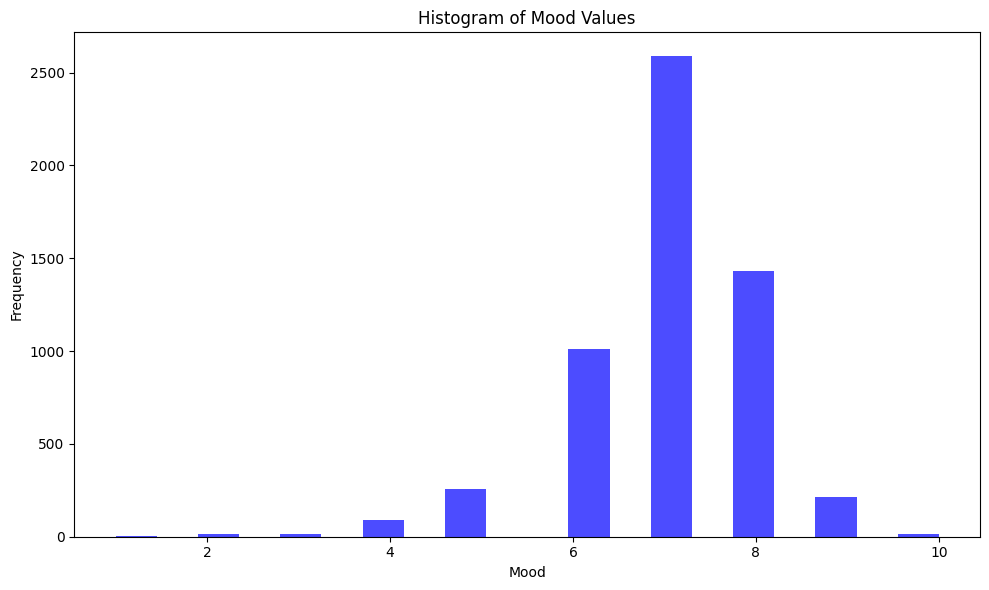

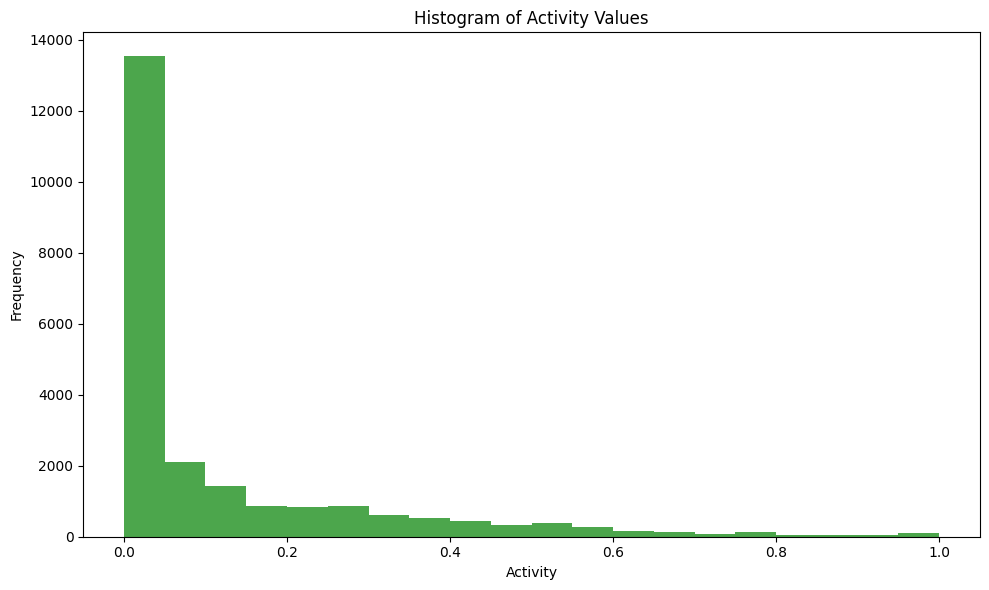

In [29]:
# -----------------------------
# Chart 3: Distribution of
# -----------------------------
# Plot histogram of mood values
plt.figure(figsize=(10, 6))
plt.hist(df_mood['value'].dropna(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.title('Histogram of Mood Values')
plt.tight_layout()
plt.show()

# Filter for activity recordings only
df_activity = df[df['variable'] == 'activity'].copy()

# Plot histogram of activity values
plt.figure(figsize=(10, 6))
plt.hist(df_activity['value'].dropna(), bins=20, color='green', alpha=0.7)
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Histogram of Activity Values')
plt.tight_layout()
plt.show()

Variable: appCat.entertainment
Average on Weekdays: 42.79498017770127
Average on Weekends: 46.490249464931104
Overall Median: 36.96414285714285
----------------------------------------


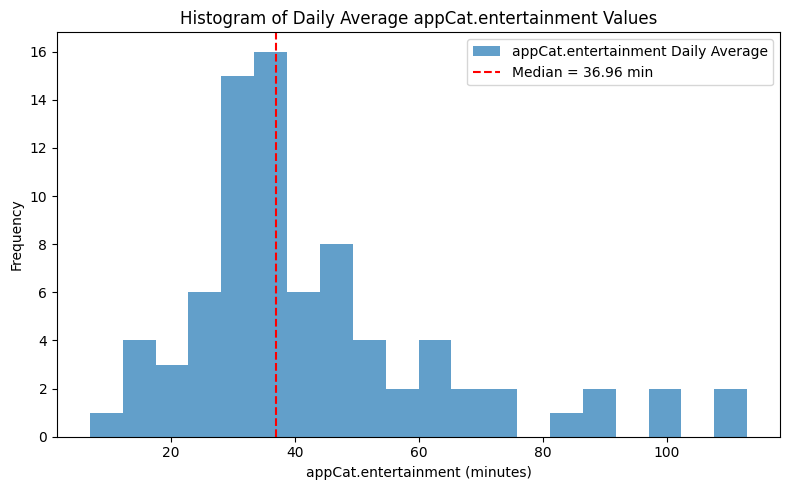

Variable: appCat.communication
Average on Weekdays: 45.123400843686525
Average on Weekends: 50.66651721225521
Overall Median: 42.91729099443988
----------------------------------------


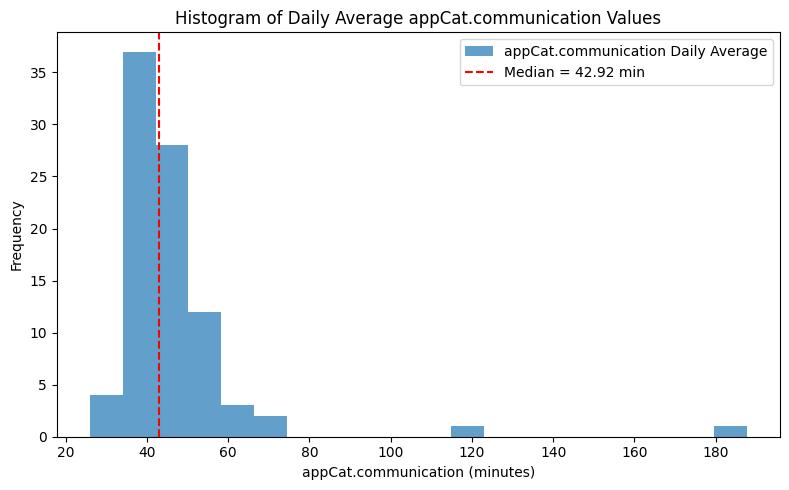

Variable: appCat.social
Average on Weekdays: 73.94791505995114
Average on Weekends: 77.43076585125928
Overall Median: 68.72846088522903
----------------------------------------


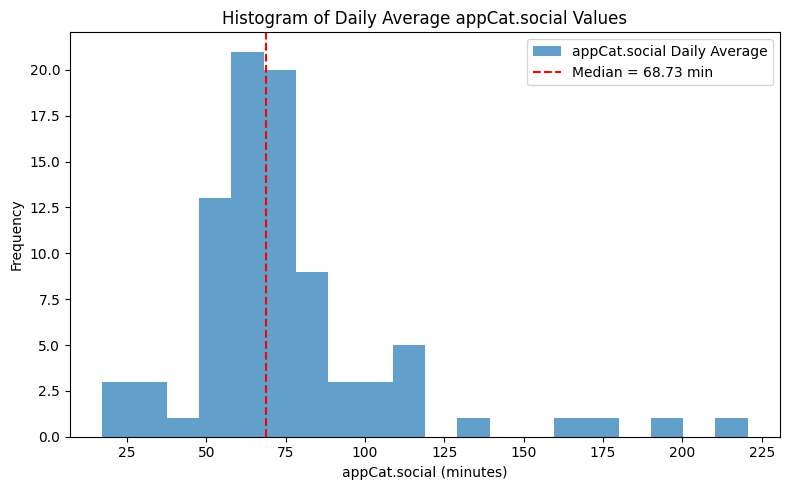

In [31]:
# List of variables to analyze
variables = ['appCat.entertainment', 'appCat.communication', 'appCat.social']

df['time'] = pd.to_datetime(df['time'])
df['variable'] = df['variable'].astype('category')
df['id'] = df['id'].astype('string')
for var in variables:
    # Filter the dataset for the current variable
    df_var = df[df['variable'] == var].copy()

    # Create a new column for date (dropping the time component)
    df_var['date'] = pd.to_datetime(df_var['time'].dt.date)

    # Compute the daily average for the variable
    daily_avg = df_var.groupby('date')['value'].mean().reset_index()

    # Determine the day of the week (Monday=0, Sunday=6) and flag weekends
    daily_avg['dayofweek'] = daily_avg['date'].dt.dayofweek
    daily_avg['is_weekend'] = daily_avg['dayofweek'] >= 5

    # Compute the overall median of daily averages (in minutes)
    overall_median = daily_avg['value'].median()

    # Compute average values for weekdays and weekends
    weekday_avg = daily_avg.loc[~daily_avg['is_weekend'], 'value'].mean()
    weekend_avg = daily_avg.loc[daily_avg['is_weekend'], 'value'].mean()

    print(f"Variable: {var}")
    print("Average on Weekdays:", weekday_avg)
    print("Average on Weekends:", weekend_avg)
    print("Overall Median:", overall_median)
    print('-' * 40)

    # Plot histogram for daily averages with median line
    plt.figure(figsize=(8, 5))
    plt.hist(daily_avg['value'].dropna(), bins=20, alpha=0.7, label=f'{var} Daily Average')
    plt.axvline(overall_median, color='red', linestyle='--',
                label=f'Median = {overall_median:.2f} min')
    plt.xlabel(f'{var} (minutes)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Daily Average {var} Values')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
# Find missing values
print("Missing values in each attribute:")
print(df.isnull().sum())

Missing values in each attribute:
Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64


In [13]:
#proportions of each unique value
df["variable"].value_counts(normalize = True)

,proportion
variable,
screen,0.256235
appCat.builtin,0.242200
appCat.communication,0.197065
appCat.entertainment,0.071966
activity,0.060929
appCat.social,0.050794
appCat.other,0.020297
circumplex.arousal,0.014972
circumplex.valence,0.014972


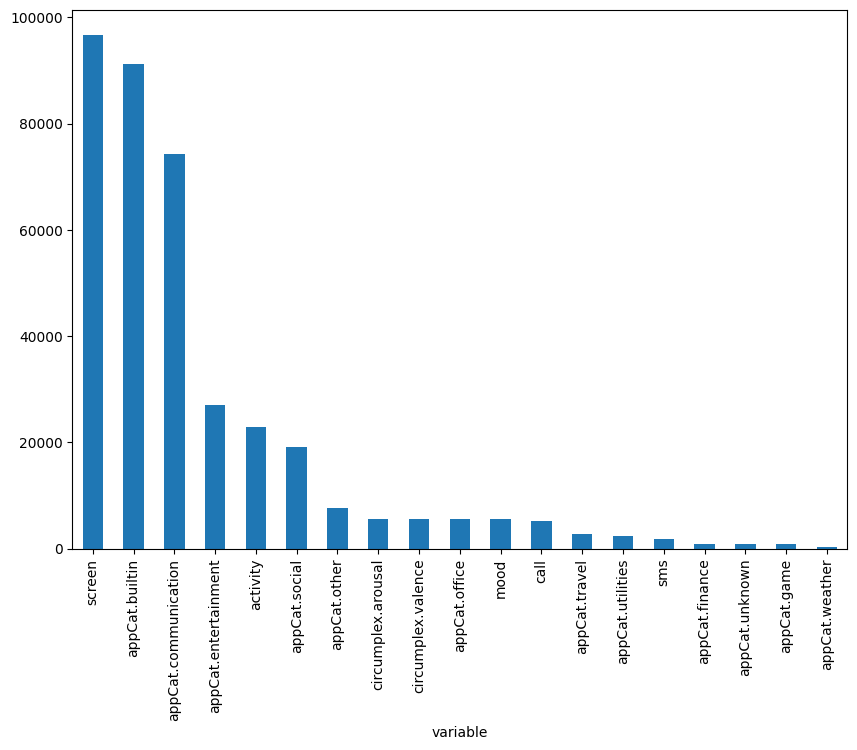

In [14]:
# Variables with most observations
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None,figsize=(10,7));

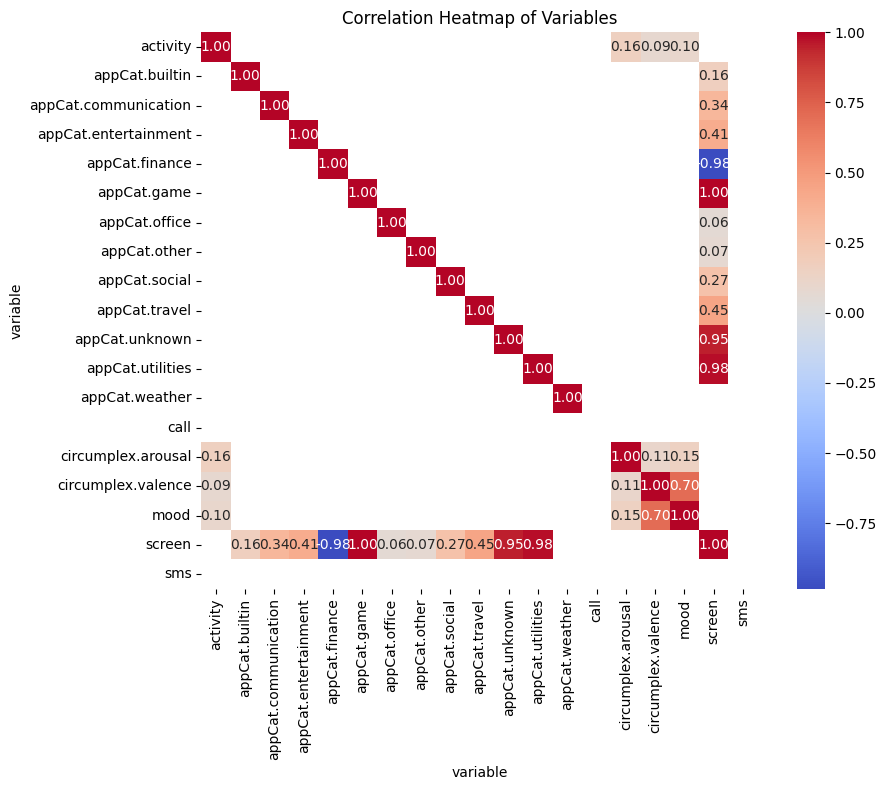

In [15]:
import seaborn as sns
# Drop the index column
df = df.drop(columns=["Unnamed: 0"])

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Pivot the data to wide format
pivot_df = df.pivot_table(index=['id', 'time'], columns='variable', values='value')

# Compute the correlation matrix
corr_matrix = pivot_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Variables")
plt.tight_layout()
plt.show()



Variable: mood
Total values: 5641
Outliers detected: 400
Outlier percentage: 7.09%


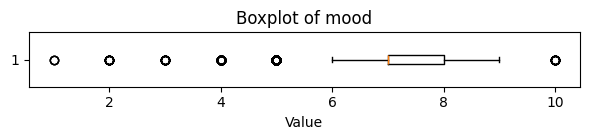


Variable: circumplex.arousal
Total values: 5597
Outliers detected: 0
Outlier percentage: 0.00%


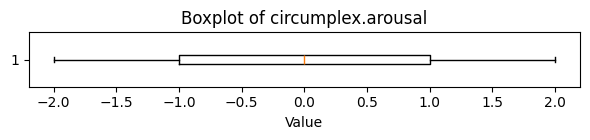


Variable: circumplex.valence
Total values: 5487
Outliers detected: 31
Outlier percentage: 0.56%


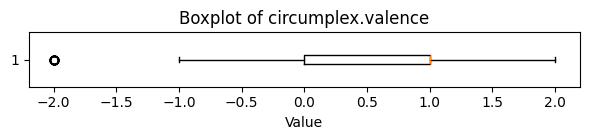


Variable: activity
Total values: 22965
Outliers detected: 2223
Outlier percentage: 9.68%


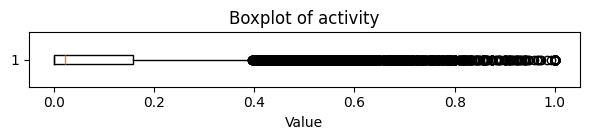


Variable: screen
Total values: 96578
Outliers detected: 10055
Outlier percentage: 10.41%


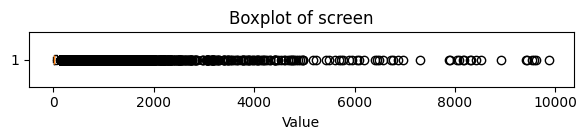


Variable: call
Total values: 5239
Outliers detected: 0
Outlier percentage: 0.00%


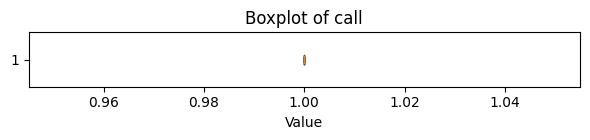


Variable: sms
Total values: 1798
Outliers detected: 0
Outlier percentage: 0.00%


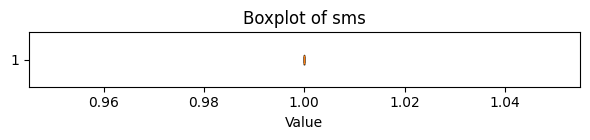


Variable: appCat.builtin
Total values: 91288
Outliers detected: 10152
Outlier percentage: 11.12%


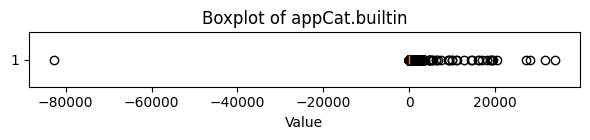


Variable: appCat.communication
Total values: 74276
Outliers detected: 6401
Outlier percentage: 8.62%


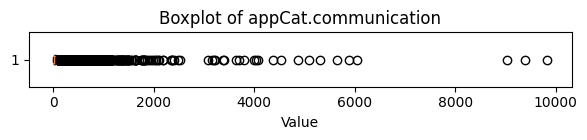


Variable: appCat.entertainment
Total values: 27125
Outliers detected: 4517
Outlier percentage: 16.65%


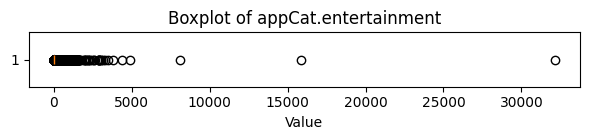


Variable: appCat.finance
Total values: 939
Outliers detected: 118
Outlier percentage: 12.57%


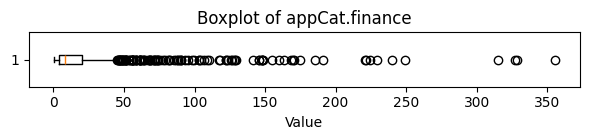


Variable: appCat.game
Total values: 813
Outliers detected: 85
Outlier percentage: 10.46%


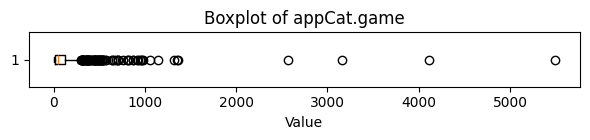


Variable: appCat.office
Total values: 5642
Outliers detected: 848
Outlier percentage: 15.03%


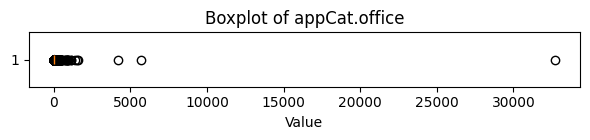


Variable: appCat.other
Total values: 7650
Outliers detected: 1000
Outlier percentage: 13.07%


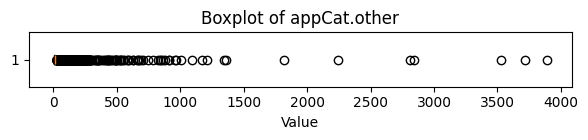


Variable: appCat.social
Total values: 19145
Outliers detected: 1838
Outlier percentage: 9.60%


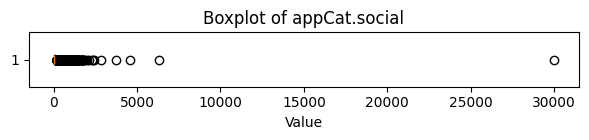


Variable: appCat.travel
Total values: 2846
Outliers detected: 181
Outlier percentage: 6.36%


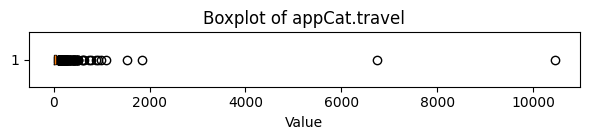


Variable: appCat.unknown
Total values: 939
Outliers detected: 80
Outlier percentage: 8.52%


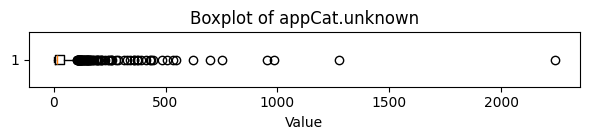


Variable: appCat.utilities
Total values: 2487
Outliers detected: 182
Outlier percentage: 7.32%


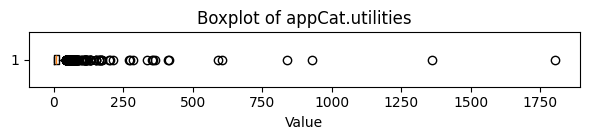


Variable: appCat.weather
Total values: 255
Outliers detected: 10
Outlier percentage: 3.92%


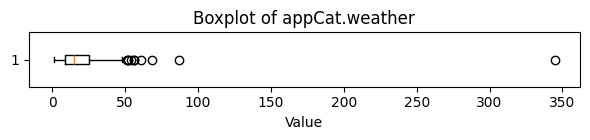

In [35]:
# List of numeric variables
numeric_vars = df['variable'].unique()

# Outlier detection using IQR
for var in numeric_vars:
    # Filter only rows for the current variable
    df_var = df[df['variable'] == var]
    values = df_var['value'].dropna()

    if values.empty:
        continue

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_var[(df_var['value'] < lower_bound) | (df_var['value'] > upper_bound)]

    print(f"\nVariable: {var}")
    print(f"Total values: {len(values)}")
    print(f"Outliers detected: {len(outliers)}")
    print(f"Outlier percentage: {100 * len(outliers) / len(values):.2f}%")

    # Optional: Plot boxplot for visual confirmation
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(values, vert=False)
    plt.title(f"Boxplot of {var}")
    plt.xlabel('Value')
    plt.tight_layout()
    plt.show()